In [1]:
from pathlib import Path
from collections import Counter

import anndata
import scanpy as sc
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

import pollock.utils as utils
import pollock.explain as explain


In [2]:
model_filepath = '../../pollock_models/pretrained_models/scRNAseq_pdac'

In [4]:
count_adata = sc.read_h5ad('../data/single_cell/original/integrated_rna.h5ad')
count_adata

AnnData object with n_obs × n_vars = 113052 × 31915
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'nCount_SCT', 'nFeature_SCT', 'CELL', 'CONDITION', 'Patient', 'Type', 'Cell_type', 'integrated_snn_res.0.75', 'seurat_clusters', 'sample_id', 'cell_type'
    var: 'features'
    obsm: 'X_umap'

In [3]:
model = utils.load_model(model_filepath)

In [5]:
# note that if you are predicting a large dataset and don't need the pollock umap embeddings you can set make_umap to False to increase runtime speed
adata = utils.predict_adata(model, count_adata, make_umap=True)
adata

2022-04-29 10:22:35,082 22502 genes overlap with model after filtering
2022-04-29 10:22:35,083 2517 genes missing from dataset after filtering
/diskmnt/Projects/Users/estorrs/miniconda3/envs/pollock_inference/lib/python3.8/site-packages/anndata/_core/merge.py:915: UserWarning: Only some AnnData objects have `.raw` attribute, not concatenating `.raw` attributes.
  warn(
2022-04-29 10:24:02,064 starting prediction of 113052 cells


AnnData object with n_obs × n_vars = 113052 × 25019
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'nCount_SCT', 'nFeature_SCT', 'CELL', 'CONDITION', 'Patient', 'Type', 'Cell_type', 'integrated_snn_res.0.75', 'seurat_clusters', 'sample_id', 'cell_type', 'n_counts', 'size_factors', 'y_pred', 'predicted_cell_type_probability', 'predicted_cell_type', 'probability Acinar', 'probability B cell', 'probability CD4 T cell', 'probability CD8 T cell', 'probability Dendritic', 'probability Endothelial', 'probability Epithelial', 'probability Erythrocyte', 'probability Fibroblast', 'probability Islet', 'probability Malignant', 'probability Mast', 'probability Monocyte', 'probability NK', 'probability Plasma', 'probability Treg', 'probability Tuft'
    var: 'mean', 'std'
    uns: 'log1p'
    obsm: 'X_emb', 'X_umap', 'prediction_probs'

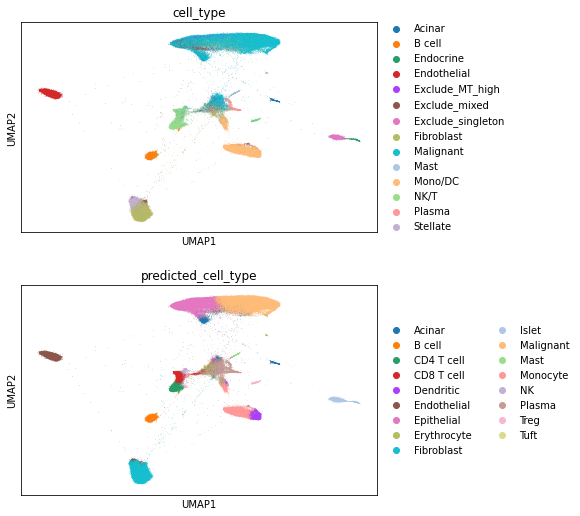

In [7]:
sc.pl.umap(adata, color=['cell_type', 'predicted_cell_type'], ncols=1)

In [9]:
adata.write_h5ad('../data/single_cell/pollock/pollock_adata.h5ad')